In [1]:
import gc
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 10000)

sys.path.append(str(Path('.').resolve().parents[0]))
from src.data import TrainTestReadWriter

In [3]:
data_path = Path('.').resolve().parents[0].joinpath("data")
raw_path = data_path.joinpath("raw")
interim_path = data_path.joinpath("interim")

In [4]:
column_types = {
    "a1": "int8",
    "a2": "int8",
    "a3": "int8",
    "age": "int8",
    "bad_comment_rate": "float32",
    "brand": "int16",
    "cate": "int8",
    "comment_num": "int8",
    "day": "uint8",
    "day_user_reg": "uint8",
    "has_bad_comment": "int8",
    "hour": "uint8",
    "model_id": "int16",
    "month": "uint8",
    "month_user_reg": "uint8",
    "sex": "int8",
    "sku_id": "int32",
    "type": "int8",
    "unix_action": "int64",
    "unix_comment": "int64",
    "unix_user_reg": "int64",
    "user_id": "int32",
    "user_lv_cd": "int8",
    "week_action": "uint8",
    "week_comment": "uint8",
    "year": "uint16",
    "year_user_reg": "uint16",
}

In [5]:
%time df = pd.read_csv('{}/all_merged.csv'.format(interim_path), dtype=column_types)

CPU times: user 49.5 s, sys: 1.8 s, total: 51.3 s
Wall time: 51.3 s


In [6]:
df.head()

,user_id,sku_id,model_id,type,cate,brand,year,month,day,week_action,hour,unix_action,age,sex,user_lv_cd,year_user_reg,month_user_reg,day_user_reg,unix_user_reg,a1,a2,a3,comment_num,has_bad_comment,bad_comment_rate,week_comment,unix_comment
0,266079,138778,-1,1,8,403,2016,1,31,4,23,1454284742,2,2,5,2012,6,15,1339718400,1,1,1,0,0,0.0,0,0
1,266079,138778,0,6,8,403,2016,1,31,4,23,1454284743,2,2,5,2012,6,15,1339718400,1,1,1,0,0,0.0,0,0
2,200719,61226,-1,1,8,30,2016,1,31,4,23,1454284747,4,2,3,2016,1,31,1454198400,1,2,1,0,0,0.0,0,0
3,200719,61226,0,6,8,30,2016,1,31,4,23,1454284748,4,2,3,2016,1,31,1454198400,1,2,1,0,0,0.0,0,0
4,263587,72348,-1,1,5,159,2016,1,31,4,23,1454284748,3,2,4,2015,1,12,1421020800,-1,-1,-1,0,0,0.0,0,0


In [69]:
df.info(memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37087895 entries, 0 to 37087894
Data columns (total 27 columns):
user_id             37087895 non-null int32
sku_id              37087895 non-null int32
model_id            37087895 non-null int16
type                37087895 non-null int8
cate                37087895 non-null int8
brand               37087895 non-null int16
year                37087895 non-null uint16
month               37087895 non-null uint8
day                 37087895 non-null uint8
week_action         37087895 non-null uint8
hour                37087895 non-null uint8
unix_action         37087895 non-null int64
age                 37087895 non-null int8
sex                 37087895 non-null int8
user_lv_cd          37087895 non-null int8
year_user_reg       37087895 non-null uint16
month_user_reg      37087895 non-null uint8
day_user_reg        37087895 non-null uint8
unix_user_reg       37087895 non-null int64
a1                  37087895 non-null int8
a2       

In [70]:
df.describe()

,user_id,sku_id,model_id,type,cate,brand,year,month,day,week_action,hour,unix_action,age,sex,user_lv_cd,year_user_reg,month_user_reg,day_user_reg,unix_user_reg,a1,a2,a3,comment_num,has_bad_comment,bad_comment_rate,week_comment,unix_comment
count,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,37087895.0,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07,3.708790e+07
mean,2.512375e+05,8.343990e+04,7.021606e+01,4.585459e+00,6.555843e+00,4.320840e+02,2016.0,3.021504e+00,1.396212e+01,1.074438e+01,1.446938e+01,1.458062e+09,2.021405e+00,9.817617e-01,4.145592e+00,2.012651e+03,6.538999e+00,1.556885e+01,1.361701e+09,9.648477e-02,-2.177775e-01,-1.554245e-01,6.371210e-01,1.520561e-01,4.911033e-03,1.905458e+00,2.460816e+08
std,2.997270e+04,4.967291e+04,9.831410e+01,2.225027e+00,1.779115e+00,2.423722e+02,0.0,7.012815e-01,8.297387e+00,2.788090e+00,6.348362e+00,1.684718e+06,1.237800e+00,9.614391e-01,9.670898e-01,2.045471e+00,3.508692e+00,8.718407e+00,6.362080e+07,1.592587e+00,1.106496e+00,1.238827e+00,1.440554e+00,3.590752e-01,1.796169e-02,4.397562e+00,5.461342e+08
min,2.000010e+05,2.000000e+00,-1.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,2016.0,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,1.454285e+09,-1.000000e+00,0.000000e+00,1.000000e+00,2.003000e+03,1.000000e+00,1.000000e+00,1.055722e+09,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.255660e+05,4.033600e+04,-1.000000e+00,1.000000e+00,5.000000e+00,2.140000e+02,2016.0,3.000000e+00,7.000000e+00,9.000000e+00,1.000000e+01,1.456869e+09,2.000000e+00,0.000000e+00,4.000000e+00,2.011000e+03,3.000000e+00,8.000000e+00,1.317773e+09,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.496840e+05,7.961600e+04,0.000000e+00,6.000000e+00,7.000000e+00,4.620000e+02,2016.0,3.000000e+00,1.300000e+01,1.100000e+01,1.500000e+01,1.458051e+09,2.000000e+00,1.000000e+00,4.000000e+00,2.013000e+03,6.000000e+00,1.500000e+01,1.363738e+09,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.770230e+05,1.268850e+05,2.160000e+02,6.000000e+00,8.000000e+00,6.230000e+02,2016.0,4.000000e+00,2.000000e+01,1.300000e+01,2.000000e+01,1.459523e+09,3.000000e+00,2.000000e+00,5.000000e+00,2.014000e+03,1.000000e+01,2.300000e+01,1.415664e+09,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.053210e+05,1.712250e+05,3.480000e+02,6.000000e+00,1.100000e+01,9.230000e+02,2016.0,4.000000e+00,3.100000e+01,1.500000e+01,2.300000e+01,1.460765e+09,5.000000e+00,2.000000e+00,5.000000e+00,2.016000e+03,1.200000e+01,3.100000e+01,1.480032e+09,3.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.460678e+09


# Basic

In [26]:
# user purchase count
purchase = df[df.type == 4]
purchase_counts = purchase.groupby('user_id').sku_id.count()

In [24]:
purchase_counts.describe()

count    29485.000000
mean         1.633068
std          1.386496
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: sku_id, dtype: float64

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


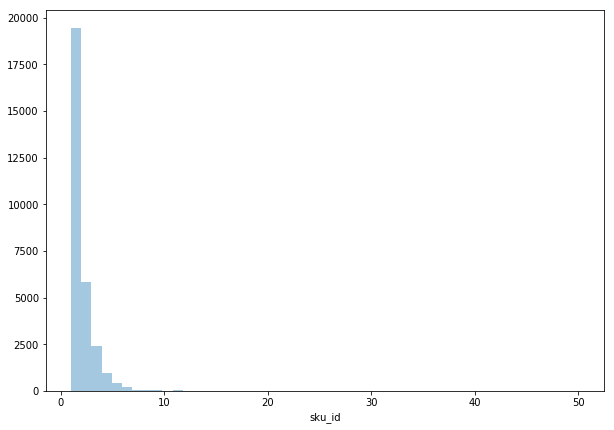

In [23]:
plt.figure(figsize=(10, 7))
ax = sns.distplot(purchase_counts, kde=False)

In [37]:
purchase_same_product = purchase.groupby(['user_id', 'sku_id']).unix_action.count().reset_index().rename(columns={'unix_action': 'cnt'})

In [38]:
purchase_same_product.cnt.describe()

count    46607.000000
mean         1.033128
std          0.256188
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         20.000000
Name: cnt, dtype: float64

In [40]:
len(purchase_same_product[purchase_same_product.cnt > 1])

1188

In [42]:
purchase_same_brand = purchase.groupby(['user_id', 'brand']).unix_action.count().reset_index().rename(columns={'unix_action': 'cnt'})

In [44]:
purchase_same_brand.cnt.describe()

count    42149.000000
mean         1.142400
std          0.558169
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         22.000000
Name: cnt, dtype: float64

In [45]:
len(purchase_same_brand[purchase_same_brand.cnt > 1])

4175

In [46]:
purchase_same_cate = purchase.groupby(['user_id', 'cate']).unix_action.count().reset_index().rename(columns={'unix_action': 'cnt'})

In [47]:
purchase_same_cate.cnt.describe()

count    42474.000000
mean         1.133658
std          0.672877
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         38.000000
Name: cnt, dtype: float64

In [48]:
len(purchase_same_cate[purchase_same_cate.cnt > 1])

3504

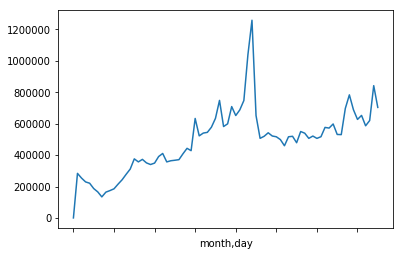

In [78]:
# daily action
df.groupby(['month', 'day']).user_id.count().plot()

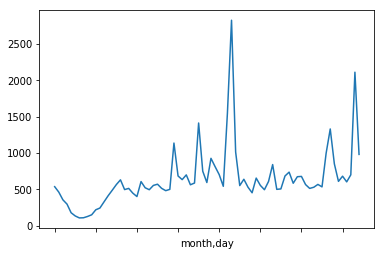

In [80]:
# daily purchase
df[df.type==4].groupby(['month', 'day']).user_id.count().plot()

In [91]:
df[df.type==4].cate.value_counts()

8     13272
4      9255
5      8131
6      6974
7      6211
9      4101
10      189
11       18
Name: cate, dtype: int64

In [107]:
dummy_types = pd.get_dummies(data=df.type)
dummy_types.columns = ['browse', 'add_cart', 'rem_cart', 'purchase', 'follow', 'click']

In [110]:
dummy_types.head()

,browse,add_cart,rem_cart,purchase,follow,click
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0


In [102]:
df[dummy_types.columns] = dummy_types

In [113]:
df.head()

,user_id,sku_id,model_id,type,cate,brand,year,month,day,week_action,hour,unix_action,age,sex,user_lv_cd,year_user_reg,month_user_reg,day_user_reg,unix_user_reg,a1,a2,a3,comment_num,has_bad_comment,bad_comment_rate,week_comment,unix_comment,browse,add_cart,rem_cart,purchase,follow,click
0,266079,138778,-1,1,8,403,2016,1,31,4,23,1454284742,2,2,5,2012,6,15,1339718400,1,1,1,0,0,0.0,0,0,1,0,0,0,0,0
1,266079,138778,0,6,8,403,2016,1,31,4,23,1454284743,2,2,5,2012,6,15,1339718400,1,1,1,0,0,0.0,0,0,0,0,0,0,0,1
2,200719,61226,-1,1,8,30,2016,1,31,4,23,1454284747,4,2,3,2016,1,31,1454198400,1,2,1,0,0,0.0,0,0,1,0,0,0,0,0
3,200719,61226,0,6,8,30,2016,1,31,4,23,1454284748,4,2,3,2016,1,31,1454198400,1,2,1,0,0,0.0,0,0,0,0,0,0,0,1
4,263587,72348,-1,1,5,159,2016,1,31,4,23,1454284748,3,2,4,2015,1,12,1421020800,-1,-1,-1,0,0,0.0,0,0,1,0,0,0,0,0


In [114]:
# user (sex, user_lv_cd, user_reg_tm)

In [120]:
df.purchase.value_counts()

0    37039744
1       48151
Name: purchase, dtype: int64

In [125]:
df.groupby('user_id').agg({'purchase': np.max}).reset_index().purchase.value_counts()

0    75695
1    29485
Name: purchase, dtype: int64

In [138]:
category_cols = ['sku_id', 'model_id', 'type', 'cate', 'brand', 'age', 'sex', 'user_lv_cd', 'a1', 'a2', 'a3', 'has_bad_comment']
numeric_cols = ['comment_num', 'bad_comment_rate']

/usr/local/lib/python3.5/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


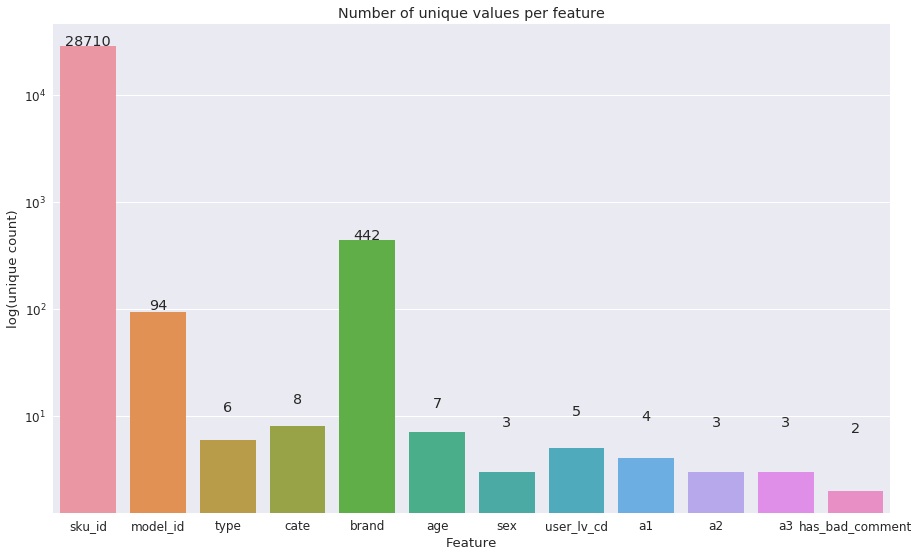

In [143]:
plt.figure(figsize=(15, 9))
category_uniques = [df[c].nunique() for c in category_cols]
sns.set(font_scale=1.2)
ax = sns.barplot(category_cols, category_uniques, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, category_uniques):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5,
            uniq,
            ha="center") 

# 用戶 (id/年齡/性別/等級/註冊日期) vs 購買行為 (瀏覽/加入購物車/移除購物車/下單/關注/點擊)

In [167]:
action_by_sex = (
    df[["user_id", "sex"]]
    .groupby("sex", as_index=False)
    .agg({"user_id": pd.Series.nunique})
    .rename(columns={"user_id": "unique_cnt"})
)

In [204]:
action_by_sex.unique_cnt

0    42787
1     7731
2    54662
Name: unique_cnt, dtype: int32

/usr/local/lib/python3.5/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


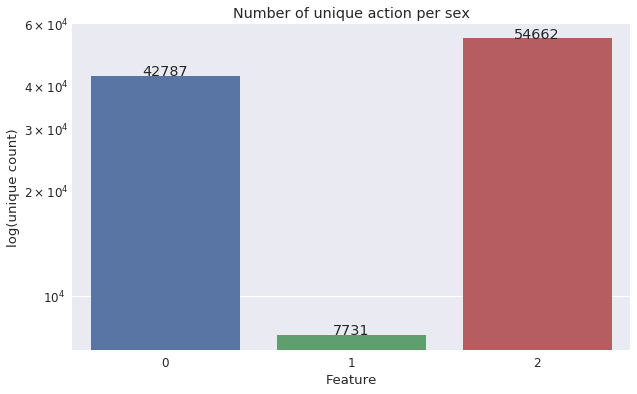

In [208]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(action_by_sex.sex, action_by_sex.unique_cnt, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique action per sex')
for p, uniq in zip(ax.patches, action_by_sex.unique_cnt):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 5,
            uniq,
            ha="center") 

In [198]:
purchase_by_sex = (
    df[df.purchase == 1][["user_id", "sex"]]
    .groupby("sex", as_index=False)
    .agg({"user_id": pd.Series.nunique})
    .rename(columns={"user_id": "unique_cnt"})
)

/usr/local/lib/python3.5/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


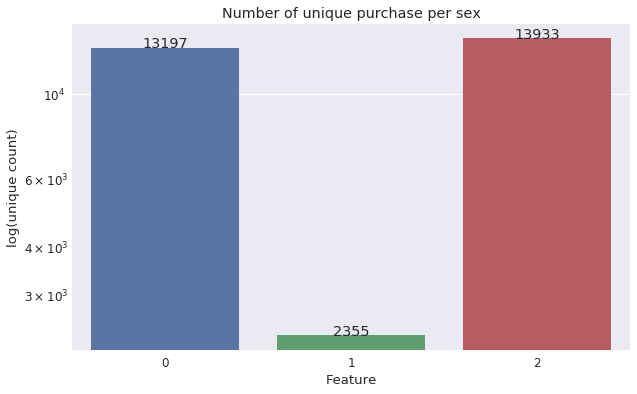

In [216]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(purchase_by_sex.sex, purchase_by_sex.unique_cnt, log=True)
ax.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique purchase per sex')
for p, uniq in zip(ax.patches, purchase_by_sex.unique_cnt):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height,
            uniq,
            ha="center") 

In [185]:
purchase_ratio = action_by_sex.merge(purchase_by_sex, on='sex', suffixes=['_action', '_purchase'])
purchase_ratio['ratio'] = purchase_ratio.unique_cnt_purchase / purchase_ratio.unique_cnt_action

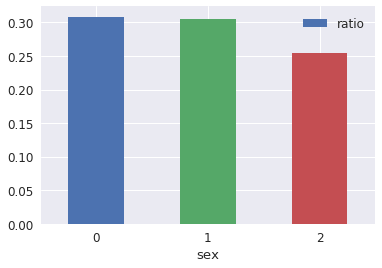

In [192]:
plt.figure(figsize=(10, 6))
purchase_ratio[['sex', 'ratio']].plot.bar(x='sex', y='ratio', rot=0)

In [ ]:
## purchase analysis

In [3]:
rw = TrainTestReadWriter()
%time train, test = rw.read('all_merged')
train.head()

CPU times: user 48.8 s, sys: 5.2 s, total: 54 s
Wall time: 54.1 s


,user_id,sku_id,model_id,type,cate,brand,year,month,day,week_action,hour,unix_action,age,sex,user_lv_cd,year_user_reg,month_user_reg,day_user_reg,unix_user_reg,a1,a2,a3,comment_num,has_bad_comment,bad_comment_rate,week_comment,unix_comment
283617,209665,15168,0,6,6,78,2016,2,2,5,0,1454371200,2,0,5,2008,11,27,1227744000,-1,-1,-1,0,0,0.0,0,0
283618,239179,36638,-1,2,5,479,2016,2,2,5,0,1454371200,1,0,5,2011,11,6,1320537600,-1,-1,-1,0,0,0.0,0,0
283619,288741,31662,21,6,8,545,2016,2,2,5,0,1454371200,2,1,4,2015,8,30,1440892800,1,1,1,0,0,0.0,0,0
283620,209665,15168,-1,1,6,78,2016,2,2,5,0,1454371200,2,0,5,2008,11,27,1227744000,-1,-1,-1,0,0,0.0,0,0
283621,267945,117882,-1,1,4,519,2016,2,2,5,0,1454371201,2,2,4,2012,7,6,1341532800,-1,-1,-1,0,0,0.0,0,0


In [4]:
def encode_types(type_series):
    dummies = pd.get_dummies(data=type_series)
    dummies.columns = ['browse', 'add_cart', 'rem_cart', 'purchase', 'follow', 'click']
    return dummies

types = encode_types(train.type)
train[types.columns] = types
train.head()

,user_id,sku_id,model_id,type,cate,brand,year,month,day,week_action,hour,unix_action,age,sex,user_lv_cd,year_user_reg,month_user_reg,day_user_reg,unix_user_reg,a1,a2,a3,comment_num,has_bad_comment,bad_comment_rate,week_comment,unix_comment,browse,add_cart,rem_cart,purchase,follow,click
283617,209665,15168,0,6,6,78,2016,2,2,5,0,1454371200,2,0,5,2008,11,27,1227744000,-1,-1,-1,0,0,0.0,0,0,0,0,0,0,0,1
283618,239179,36638,-1,2,5,479,2016,2,2,5,0,1454371200,1,0,5,2011,11,6,1320537600,-1,-1,-1,0,0,0.0,0,0,0,1,0,0,0,0
283619,288741,31662,21,6,8,545,2016,2,2,5,0,1454371200,2,1,4,2015,8,30,1440892800,1,1,1,0,0,0.0,0,0,0,0,0,0,0,1
283620,209665,15168,-1,1,6,78,2016,2,2,5,0,1454371200,2,0,5,2008,11,27,1227744000,-1,-1,-1,0,0,0.0,0,0,1,0,0,0,0,0
283621,267945,117882,-1,1,4,519,2016,2,2,5,0,1454371201,2,2,4,2012,7,6,1341532800,-1,-1,-1,0,0,0.0,0,0,1,0,0,0,0,0


In [5]:
used_cols = ['user_id', 'sku_id', 'unix_action', 'month', 'day', 'purchase']
purchase = train[train.purchase == 1][used_cols].drop_duplicates()

### one day purchase user number: 12217, ratio: 0.34

In [6]:
first_sku_browse = train[used_cols][train.browse == 1].groupby(['user_id', 'sku_id']).min().reset_index()

In [7]:
browse_and_purchase_same_day = first_sku_browse.merge(purchase, how='inner', on=['user_id', 'sku_id', 'month', 'day'])

In [ ]:
ratio = len(browse_and_purchase_same_day) / len(purchase)
print('Same day purchase ratio = {:.2f} == {}/{}'.format(ratio, len(browse_and_purchase_same_day), len(purchase)))

### 24hr purchase user number: 18226, ratio: 0.52

In [11]:
def get_unix_diff_one_day(df, time_start, time_end):
    mask = (df[time_end] - df[time_start]) < 60*60*24
    return df[mask]

browse_and_purchase_merge = first_sku_browse.merge(purchase, how='inner', on=['user_id', 'sku_id'], suffixes=['_b', '_p'])
browse_and_purchase_merge_in_one_day = get_unix_diff_one_day(browse_and_purchase_merge, 'unix_action_b', 'unix_action_p')

In [ ]:
# 這裡的 browse_and_purchase_merge (35166) 比 purchase (36038) 還少，資料有問題？

### first browse to purchase decision interval

In [12]:
browse_and_purchase_merge['unix_diff'] = browse_and_purchase_merge.unix_action_p - browse_and_purchase_merge.unix_action_b
browse_and_purchase_merge = browse_and_purchase_merge[browse_and_purchase_merge.unix_diff >= 0]
decision_interval = pd.to_timedelta(browse_and_purchase_merge['unix_diff'], unit='s')
decision_interval.describe()

count                     34237
mean     5 days 08:16:01.479364
std      9 days 04:09:17.674534
min             0 days 00:00:01
25%             0 days 00:37:21
50%             0 days 23:27:24
75%             6 days 07:56:59
max            59 days 00:57:12
Name: unix_diff, dtype: object

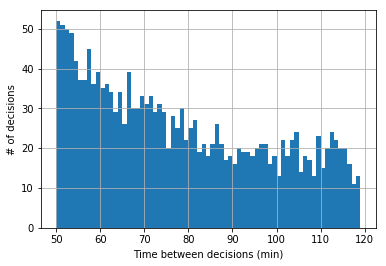

In [33]:
(decision_interval / pd.Timedelta(minutes=1)).hist(bins=range(50, 120, 1))
plt.xlabel('Time between decisions (min)')
plt.ylabel('# of decisions');

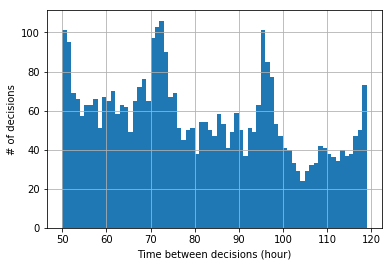

In [34]:
(decision_interval / pd.Timedelta(hours=1)).hist(bins=range(50, 120, 1))
plt.xlabel('Time between decisions (hour)')
plt.ylabel('# of decisions');

In [49]:
decision_hour_dist = decision_interval / pd.Timedelta(hours=1)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


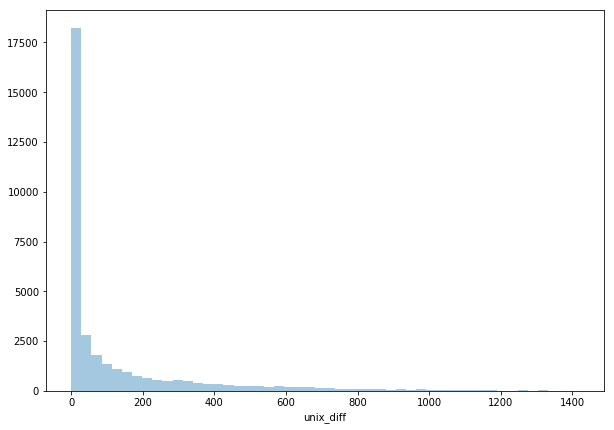

In [44]:
plt.figure(figsize=(10, 7))
ax = sns.distplot(decision_hour_dist, kde=False)

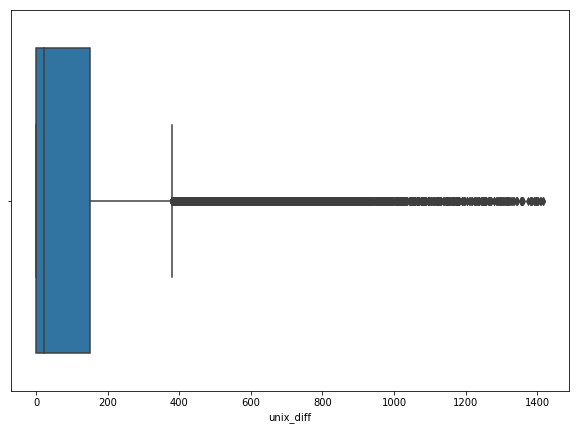

In [51]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(decision_hour_dist)

In [19]:
# find 1 day delta quantile
q = decision_interval.sort_values().searchsorted(pd.Timedelta(value=1, unit='D'))[0]/len(decision_interval)
decision_interval.quantile(q)

Timedelta('1 days 00:00:02.885299')

In [1]:
# 購物車轉換率

# 商品特徵 (sku/a1/a2/a3/cate/brand) vs 購買行為

In [131]:
df[df.purchase == 1].sku_id.nunique() / df.sku_id.nunique()

0.1486590038314176

In [137]:
df[(df.purchase == 1) & (df.a1 != -1)].sku_id.nunique() / df.sku_id.nunique()

0.028526645768025077

In [51]:
product = pd.read_csv(raw_path.joinpath('JData_Product.csv'))

In [54]:
product.cate.unique()

array([8])

# 商品評價 (num/has_bad/bad_rate) vs 購買行為

# 用戶

In [ ]:
3.4 Categorical features
3.4.1 Visualizaing most frequents values in training data
3.4.2 Case when App was downloaded i.e is_attributed == 1
3.4.3 Situation in test data